In [114]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# scale 
from sklearn.preprocessing import StandardScaler

# KMeans Clustering
from sklearn.cluster import KMeans

# Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram 
from scipy.cluster.hierarchy import cut_tree

In [115]:
data = pd.read_csv("D:Downloads/Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Data Quality Check

In [116]:
# Convert exports, imports and health spending percentages to absolute values
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [117]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [118]:
data.shape

(167, 10)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [120]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# EDA

In [121]:
country = data["country"]
data[country.isin(country[country.duplicated()])].sort_values("country")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


Since the result is null it shows that there are no duplicates

In [122]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are no null values and the so we can move on with the analysis

In [123]:
data_final = data
col= data_final.drop('country',1)
col.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [124]:
col.shape

(167, 9)

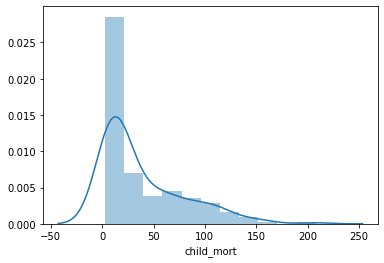

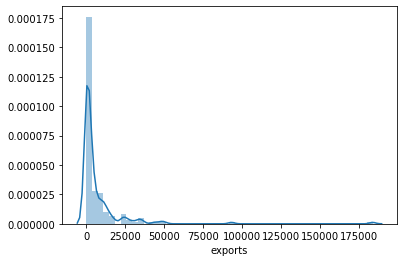

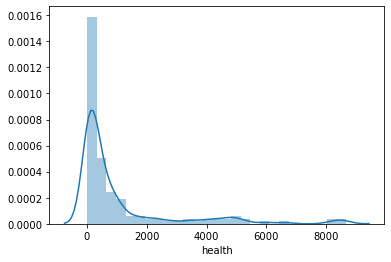

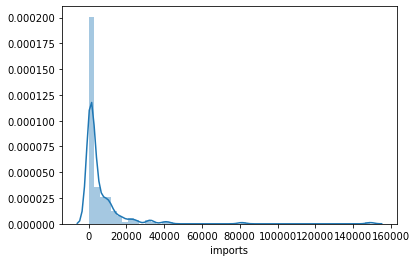

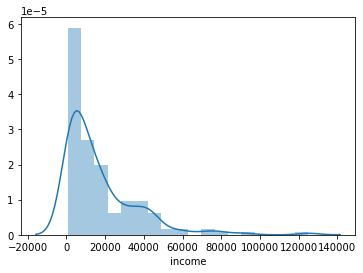

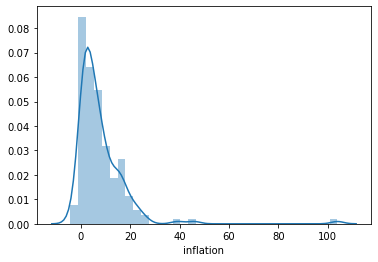

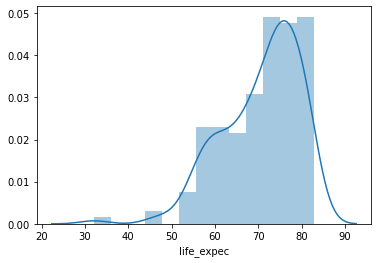

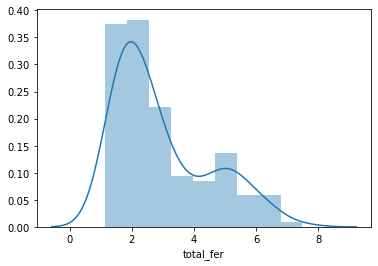

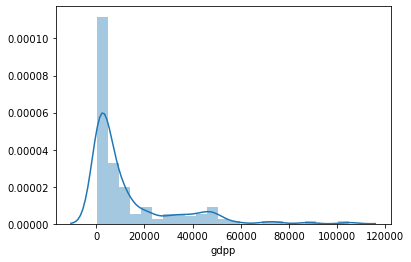

In [125]:
# distplot

for c in col:
    sns.distplot(col[c])
    plt.show();

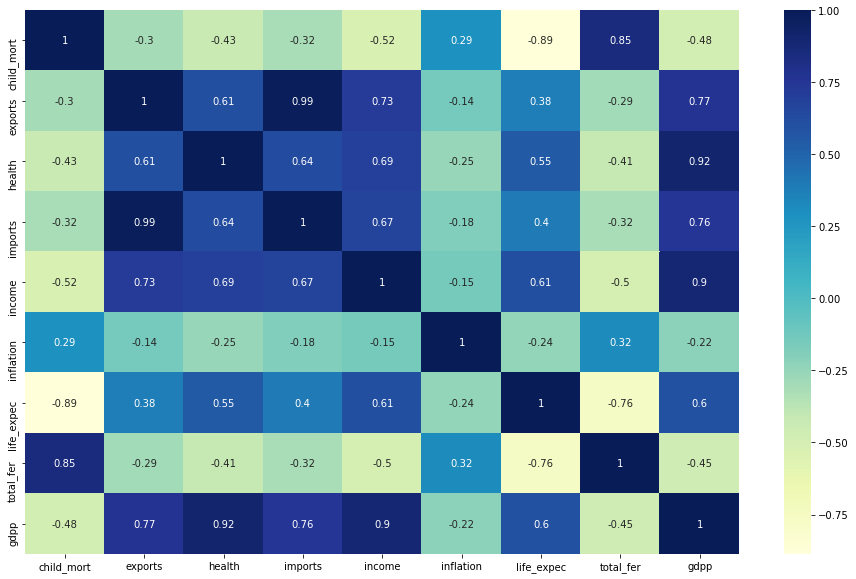

In [126]:
plt.figure(figsize=(16,10))

sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")

# OUTLIER TREATMENT

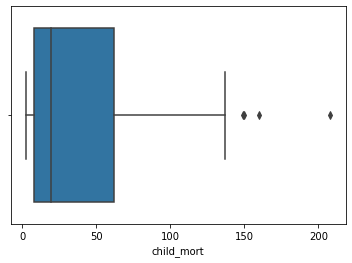

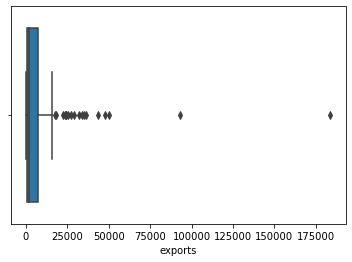

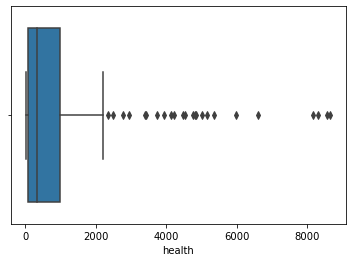

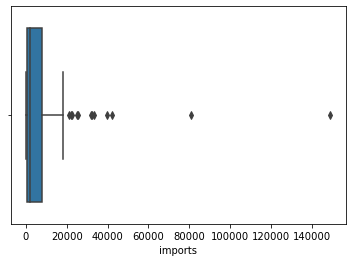

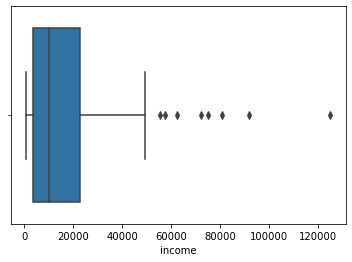

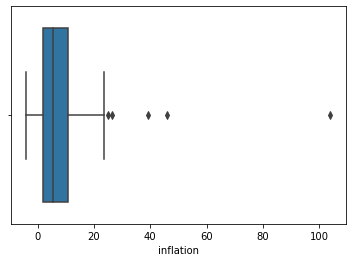

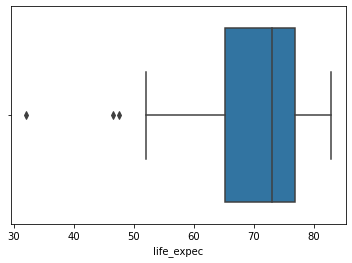

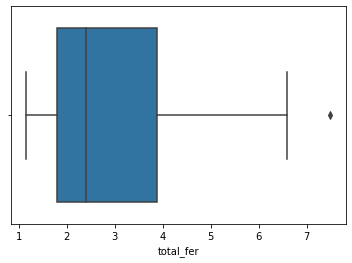

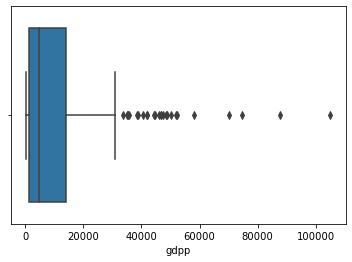

In [127]:
for c in col:
    sns.boxplot(data[c])
    plt.show();

In [128]:
q1 = data['child_mort'].quantile(0.01)
q2 = data['child_mort'].quantile(0.99)
print(q1,q2)
q3 = data['inflation'].quantile(0.01)
q4 = data['inflation'].quantile(0.99)
print(q3,q4)
q5 = data['total_fer'].quantile(0.01)
q6 = data['total_fer'].quantile(0.99)
print(q5,q6)

2.8 153.40000000000003
-2.3487999999999998 41.47800000000002
1.2431999999999999 6.563599999999999


In [129]:
data['child_mort'][data['child_mort']<=q1] = q1
data['child_mort'][data['child_mort']>=q2] = q2
data['inflation'][data['inflation']<=q3] = q3
data['inflation'][data['inflation']>=q4] = q4
data['total_fer'][data['total_fer']<=q5] = q5
data['total_fer'][data['total_fer']>=q6] = q6

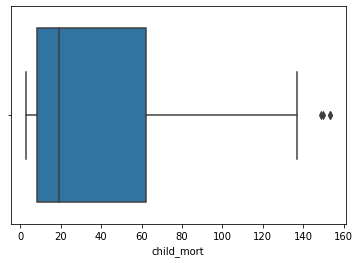

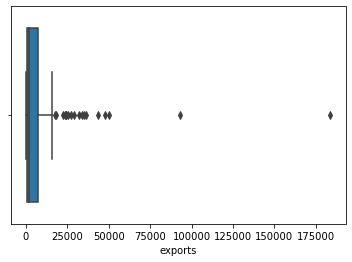

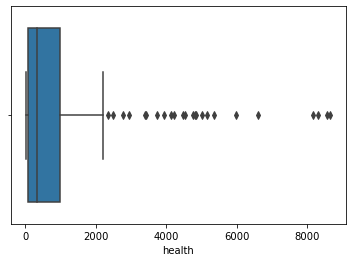

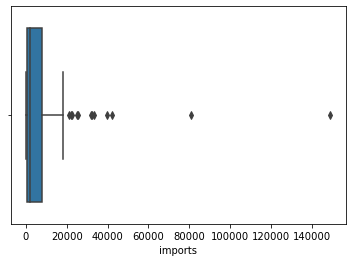

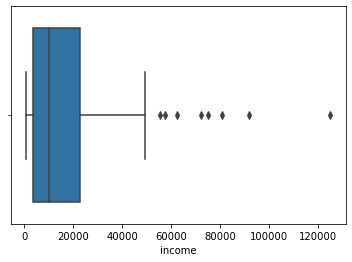

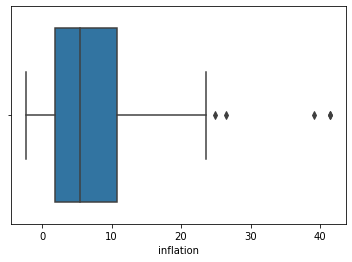

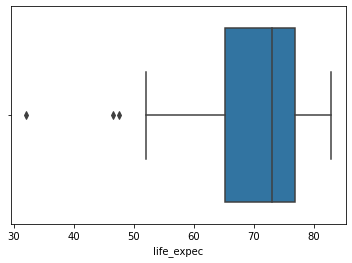

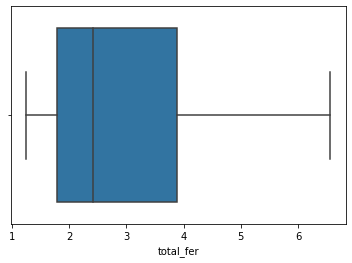

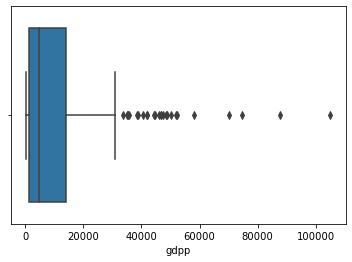

In [130]:
for c in col:
    sns.boxplot(data[c])
    plt.show();

# Check the cluster tendancy: Hopkin's Test

In [131]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [132]:
for i in range(20):
    print(hopkins(data.drop('country', axis=1)),end=' | ')

0.9731369732974315 | 0.975135056533029 | 0.9274769922893091 | 0.9676861700760032 | 0.959101618356071 | 0.9663389688403617 | 0.9847009520185787 | 0.8605159605754404 | 0.9698616765248583 | 0.9794268361618401 | 0.966499812044482 | 0.9218660744106544 | 0.9385103608023715 | 0.9725090027205678 | 0.9263606272218156 | 0.9865621934746948 | 0.9023766864396107 | 0.9738496314176905 | 0.9874214399442244 | 0.9693207327917296 | 

# Scaling

In [133]:
ss = StandardScaler()
data1 = ss.fit_transform(data.drop("country",axis=1))
data1

array([[ 1.34401227, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.92692802, -0.67917961],
       [-0.54754345, -0.35019096, -0.43921769, ...,  0.64786643,
        -0.86591134, -0.48562324],
       [-0.27254826, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.03542674, -0.46537561],
       ...,
       [-0.3753502 , -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66498765, -0.63775406],
       [ 0.47276581, -0.39216643, -0.55059641, ..., -0.34463279,
         1.15672052, -0.63775406],
       [ 1.16153882, -0.38395214, -0.54049845, ..., -2.09278484,
         1.64563484, -0.62954556]])

In [134]:
data1 = pd.DataFrame(data1)
data1.head()

,0,1,2,3,4,5,6,7,8
0,1.344012,-0.411011,-0.565040,-0.432276,-0.808245,0.263649,-1.619092,1.926928,-0.679180
1,-0.547543,-0.350191,-0.439218,-0.313677,-0.375369,-0.375251,0.647866,-0.865911,-0.485623
2,-0.272548,-0.318526,-0.484826,-0.353720,-0.220844,1.123260,0.670423,-0.035427,-0.465376
3,2.084186,-0.291375,-0.532363,-0.345953,-0.585043,1.936405,-1.179234,2.154642,-0.516268
4,-0.709457,-0.104331,-0.178771,0.040735,0.101732,-0.768917,0.704258,-0.544433,-0.041817


In [135]:
col

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [136]:
col.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Find the best value of k: SSD, Silhoutte Score

In [137]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(data1)
    ss.append([k, silhouette_score(data1, kmean.labels_)])
    
ss

[[2, 0.44879326828526084],
 [3, 0.4047941288926088],
 [4, 0.4099748611316778],
 [5, 0.3990798850002428],
 [6, 0.3625278418583998],
 [7, 0.31589716631161924],
 [8, 0.2931874242809759],
 [9, 0.31668316386479706],
 [10, 0.3101940112350796]]

In [138]:
sil = pd.DataFrame(ss)
sil

,0,1
0,2,0.448793
1,3,0.404794
2,4,0.409975
3,5,0.399080
4,6,0.362528
5,7,0.315897
6,8,0.293187
7,9,0.316683
8,10,0.310194


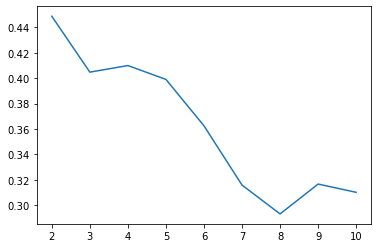

In [139]:
plt.plot(sil[0], sil[1]);

In [140]:
# SSD: Elbow

ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(data1)
    ssd.append([k, kmean.inertia_])
ssd

[[2, 933.9593716154855],
 [3, 642.7610703155511],
 [4, 470.2437543991313],
 [5, 412.8215476193096],
 [6, 359.03262021719826],
 [7, 320.4987783365944],
 [8, 281.02907608965006],
 [9, 253.48372673655132],
 [10, 217.50683697231273]]

In [141]:
ssd = pd.DataFrame(ssd)
ssd

,0,1
0,2,933.959372
1,3,642.761070
2,4,470.243754
3,5,412.821548
4,6,359.032620
5,7,320.498778
6,8,281.029076
7,9,253.483727
8,10,217.506837


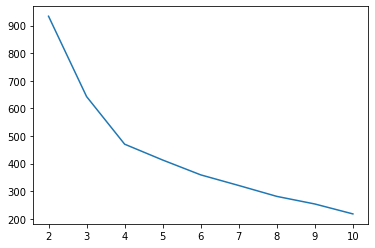

In [142]:
plt.plot(ssd[0],ssd[1]);

# Final KMeans with K==3

# Using the final value of k, perform final KMeans Analysis

In [143]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data1)

KMeans(n_clusters=3, random_state=0)

In [144]:
# Centroids
kmeans.cluster_centers_

array([[ 1.34749254, -0.36504233, -0.52444743, -0.39281661, -0.68923797,
         0.41448121, -1.27627565,  1.35913998, -0.60496339],
       [-0.45098306, -0.21297273, -0.28365905, -0.1962204 , -0.16527697,
        -0.04581016,  0.32760944, -0.47397619, -0.27275434],
       [-0.84429227,  1.31794823,  1.82094465,  1.3111162 ,  1.71870094,
        -0.56165621,  1.12317044, -0.78953164,  1.92353171]])

In [145]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [146]:
# Now we will assign labels to our original df
data['labels'] = kmeans.labels_

In [147]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [148]:
data['labels'].value_counts()

1    91
0    48
2    28
Name: labels, dtype: int64

# Visualize the cluster using a scatter plots


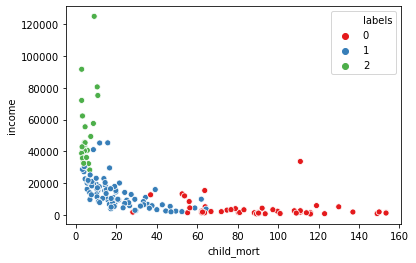

In [168]:
sns.scatterplot(x='child_mort', y='income', hue='labels', data=data, palette='Set1');


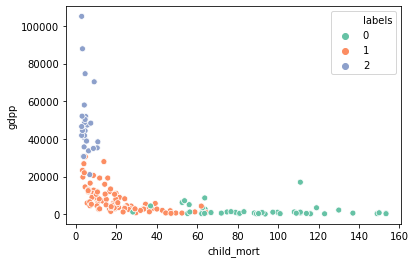

In [169]:
sns.scatterplot(x='child_mort', y='gdpp', hue='labels', data=data, palette='Set2');


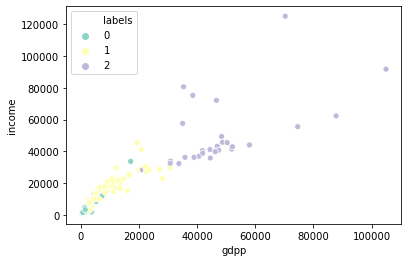

In [170]:
sns.scatterplot(x='gdpp', y='income', hue='labels', data=data, palette='Set3');

# CLUSTER PROFILING

In [150]:
data[['gdpp','income','labels']].groupby('labels').mean()

,gdpp,income
labels,,
0,1909.208333,3897.354167
1,7979.912088,13968.021978
2,48114.285714,50178.571429


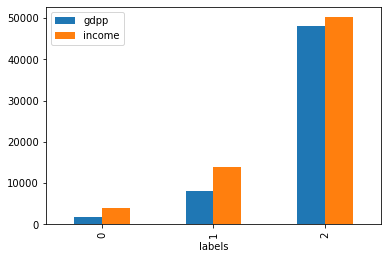

In [151]:
data[['gdpp','income','labels']].groupby('labels').mean().plot(kind='bar');

In [152]:
data[['child_mort','income','labels']].groupby('labels').mean()

,child_mort,income
labels,,
0,90.335417,3897.354167
1,20.357143,13968.021978
2,5.053571,50178.571429


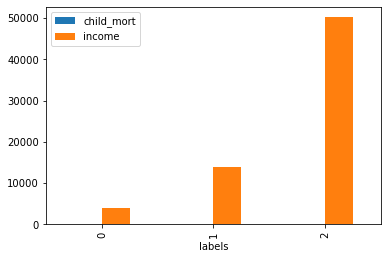

In [153]:
data[['child_mort','income','labels']].groupby('labels').mean().plot(kind='bar');

In [154]:
data[['gdpp','child_mort','labels']].groupby('labels').mean()

,gdpp,child_mort
labels,,
0,1909.208333,90.335417
1,7979.912088,20.357143
2,48114.285714,5.053571


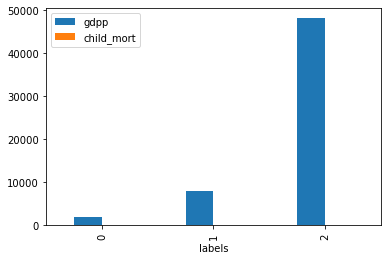

In [155]:
data[['gdpp','child_mort','labels']].groupby('labels').mean().plot(kind='bar');

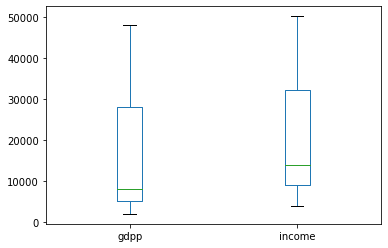

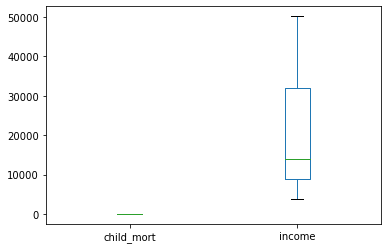

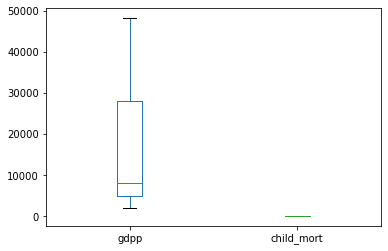

In [156]:
data[['gdpp','income','labels']].groupby('labels').mean().plot(kind='box');
data[['child_mort','income','labels']].groupby('labels').mean().plot(kind='box');
data[['gdpp','child_mort','labels']].groupby('labels').mean().plot(kind='box');

# Identifying the countries once we have identified the cluster

In [157]:
c1 = data[data['labels']==0]
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.8200,553,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.1600,3530,0
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.3600,758,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.920,57.1,2.8800,6350,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.8700,575,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.2600,231,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.1100,1310,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.2100,446,0
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.5636,897,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.7500,769,0


In [158]:
c1.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.2600,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.0200,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.5400,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,6.5636,348,0
132,Sierra Leone,153.4,67.0320,52.2690,137.655,1220,17.20,55.0,5.2000,399,0


# Hierarchial Clustering

In [159]:
col.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


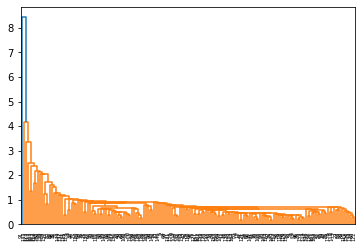

In [160]:
# single linkage
mergings = linkage(data1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

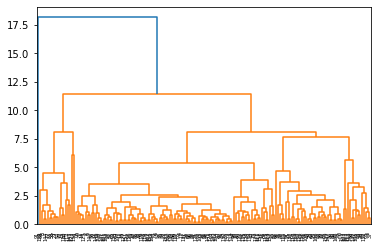

In [161]:
# complete linkage
mergings = linkage(data1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [162]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [163]:
# assign cluster labels
col['cluster_labels'] = cluster_labels
col.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


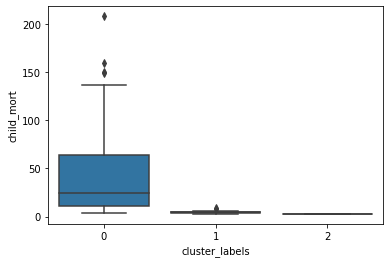

In [164]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=col)

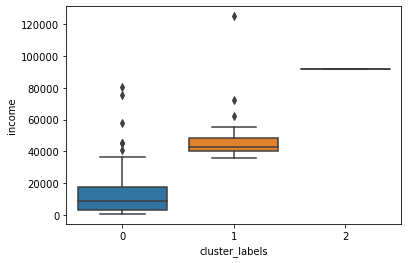

In [165]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=col)

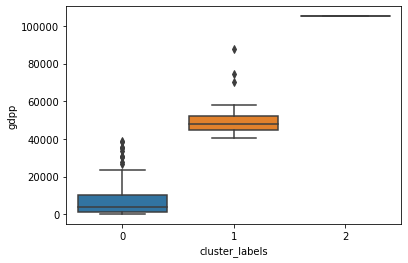

In [166]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=col)

In [167]:
c1 = data[data['labels']==0]
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,0
